### Import Libraries

In [43]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel


### Read Files

In [44]:
df = pd.read_csv("./digit-recognizer/train.csv")
test_data = pd.read_csv("digit-recognizer/test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Make Test Files

In [45]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]
trainx,testx,trainy,testy=   train_test_split(X,Y, test_size= 0.25)

### Use Random Forest Classifier

In [46]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel.fit(trainx, trainy)
seltrainx = trainx.columns[sel.get_support()]


In [55]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(trainx[seltrainx], trainy)

RandomForestClassifier(n_estimators=1000)

Prediction of Single Test Through Select From Model

In [58]:
predictions = rf.predict(testx[seltrainx])
RfAccuracy = accuracy_score(testy, predictions)
RfAccuracy

0.9655238095238096

In [57]:
Rf2 = RandomForestClassifier(n_estimators=1000)
Rf2.fit(trainx, trainy)
predictions2 = Rf2.predict(testx)
RfAccuracy2 = accuracy_score(testy, predictions2)
print(RfAccuracy, RfAccuracy2)

0.9655238095238096 0.9684761904761905


In [59]:
def getAccuracy (estimator, train_x, test_x, train_y, test_y):
    rf = RandomForestClassifier(n_estimators= estimator)
    rf.fit(train_x,train_y)
    prediction = rf.predict(test_x)
    RfAccuracy = accuracy_score(test_y, prediction)
    return RfAccuracy


In [60]:
leaf_nodes = np.array([5,15,35,200,300,500,1000,2000])
max = 0
optimal = 0
tests = []
for i in leaf_nodes:
    test = getAccuracy(i,trainx,testx,trainy,testy)
    tests.append(test)
    if (test > max): 
      optimal = i
      max = test


Text(0, 0.5, 'Accuracy')

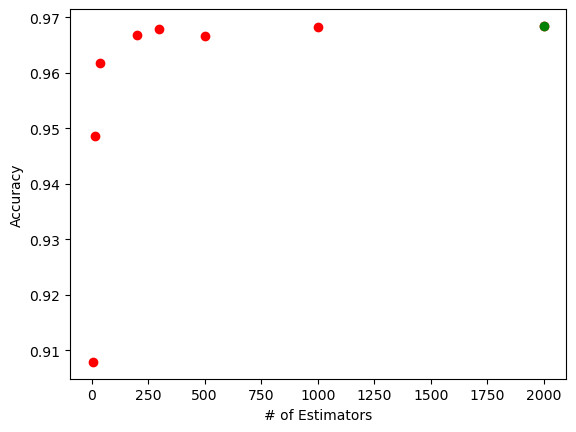

In [62]:
plt.plot(leaf_nodes, tests, 'ro')
plt.plot(optimal, max, 'go')

plt.xlabel('# of Estimators')
plt.ylabel('Accuracy')
